## Source: https://www.kaggle.com/ankitjha/logistic-regression-step-by-step

In [2]:
import os
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame
import scipy.optimize as opt  
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd

df = pd.read_csv('mushrooms.csv', encoding='utf-8')
df.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
df.head()[:2]

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g


In [4]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for col in df.columns:
    df[col]=labelencoder.fit_transform(df[col])
df.head()[:2]

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1


[Text(0, 0.5, 'No of unique elements'),
 Text(0.5, 0, 'Features'),
 Text(0.5, 1.0, 'Unique elements per column')]

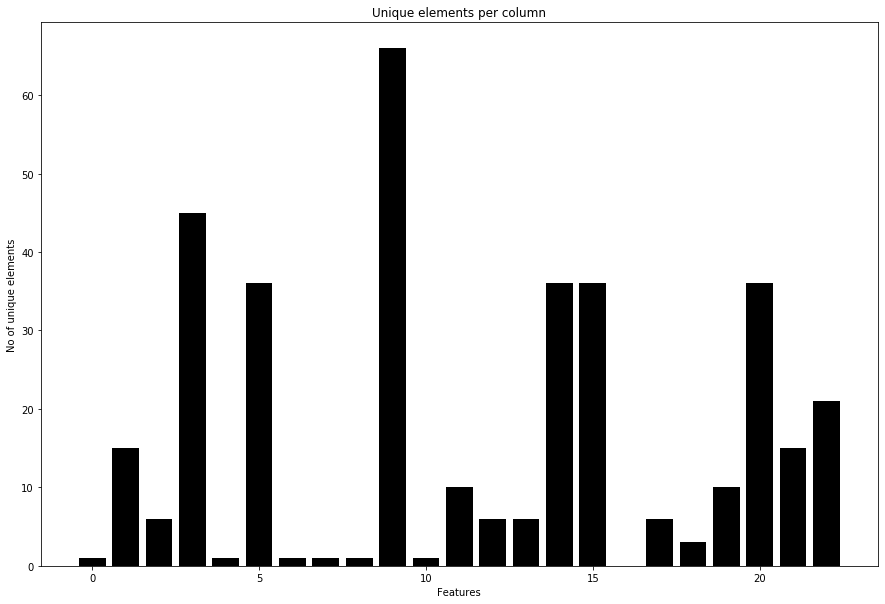

In [6]:
count_var=[]
for col in df.columns:
    count_var.append(df[col].unique().sum())
size=np.arange(len(count_var))
fig=plt.figure(figsize = (15,10))
ax=fig.add_subplot(1,1,1)
ax.bar(size,count_var, color = 'k')
ax.set(title="Unique elements per column",
      ylabel='No of unique elements',
      xlabel='Features')

In [7]:
df.corr()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,...,-0.298801,-0.154003,-0.146730,NaN,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,...,-0.032591,-0.031659,-0.030390,NaN,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,...,0.107965,0.066050,0.068885,NaN,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,...,-0.047710,0.002364,0.008057,NaN,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,...,0.458983,0.083538,0.092874,NaN,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,...,0.061820,0.174532,0.169407,NaN,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,...,-0.116177,0.099299,0.097160,NaN,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,...,-0.213775,0.274574,0.253505,NaN,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,...,0.010894,0.296548,0.278708,NaN,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,...,0.257224,-0.058299,-0.074781,NaN,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


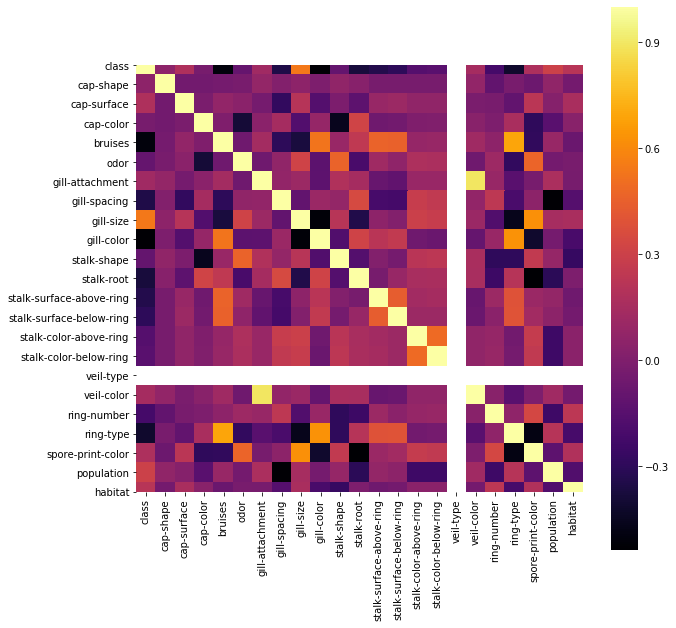

In [10]:
import seaborn as sns
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), cmap = 'inferno',square=True)

In [11]:
#Separating the train and target values.Lets select only two features so that things can be intuitively easy.So lers select the most corellated features to 'class' . 
target=df['class']
train=df[['gill-size','gill-color']]
print(train.shape)
print(target.shape)

(8124, 2)
(8124,)


Text(0.5, 1.0, 'Class distribution')

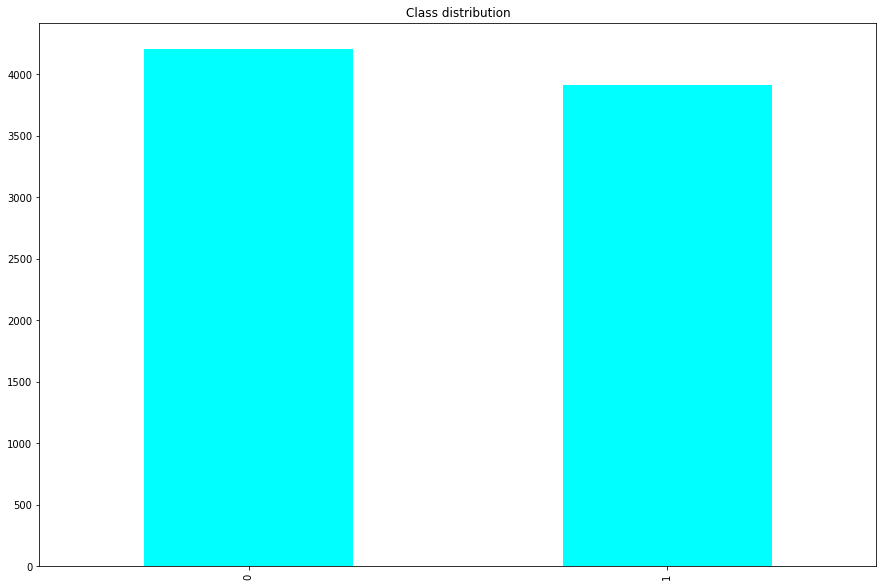

In [13]:
#Count of the classes
fig=plt.figure(figsize = (15,10))
ax=fig.add_subplot(1,1,1)
pd.value_counts(target).plot(kind='bar', cmap = 'cool')
plt.title("Class distribution")

In [14]:
def sigmoid(theta,X):  
    X = np.array(X)
    theta = np.asarray(theta)
    return((1/(1+math.e**(-X.dot(theta)))))

In [15]:
# Function for the cost function of the logistic regression.
def cost(theta, X, Y):
    first = np.multiply(-Y, np.log(sigmoid(theta,X)))
    second = np.multiply((1 - Y), np.log(1 - sigmoid(theta,X)))
    return np.sum(first - second) / (len(X))

In [16]:
# It calculates the gradient of the log-likelihood function.
def log_gradient(theta,X,Y):
    first_calc = sigmoid(theta, X) - np.squeeze(Y).T
    final_calc = first_calc.T.dot(X)
    return(final_calc.T)

In [17]:
# This is the function performing gradient descent.
def gradient_Descent(theta,X,Y,itr_val,learning_rate=0.00001):
    cost_iter=[]
    cost_val=cost(theta,X,Y)
    cost_iter.append([0,cost_val])
    change_cost = 1
    itr = 0
    while(itr < itr_val):
        old_cost = cost_val
        theta = theta - (0.01 * log_gradient(theta,X,Y))
        cost_val = cost(theta,X,Y)
        cost_iter.append([i,cost])
        itr += 1
    return theta

In [18]:
def pred_values(theta,X,hard=True):
    X = (X - np.mean(X,axis=0))/np.std(X,axis=0)
    pred_prob = sigmoid(theta,X)
    pred_value = np.where(pred_prob >= .5 ,1, 0)
    return pred_value

In [19]:
theta = np.zeros((train.shape)[1])
theta = np.asmatrix(theta)
theta = theta.T
target = np.asmatrix(target).T
y_test = list(target)

In [20]:
params = [10,20,30,50,100]
for i in range(len(params)):
    th = gradient_Descent(theta,train,target,params[i])
    y_pred = list(pred_values(th, train))
    score = float(sum(1 for x,y in zip(y_pred,y_test) if x == y)) / len(y_pred)
    print("The accuracy after " + '{}'.format(params[i]) + " iterations is " + '{}'.format(score))

The accuracy after 10 iterations is 0.7626784835056623
The accuracy after 20 iterations is 0.36681437715411125
The accuracy after 30 iterations is 0.7506154603643526
The accuracy after 50 iterations is 0.7444608567208272
The accuracy after 100 iterations is 0.7562776957163959


In [21]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(train, target)
clf.score(train, target)

0.7725258493353028